# Non Binary Classification Model using Julia Flux

Version: 1.00

### Readme

I did the "**Deep Learning with Flux**" course provided by **Julia Academy** (https://juliaacademy.com/courses/). I express my sincere gratitude to **Dr. Matt Bauman** for presenting this course and sharing the associated Jupyter Notebook. This notebook is associated with second lecture "**Introduction to Neural Networks**" of the mentioned course.

As I was attending the lecture, I realized I need to code myself to understand and record my inferences and in the process came up with this working notebook. Intent is to have this for my future reference as well as be useful to someone new to the field learning ML/DL.

This notebook provides a quick introduction to **Neural Networks** by having a **Non Binary Classification Model** implemented to **classify Apples, Bananas and Grapes Images**. 

Details of what this notebook covers is listed below:
- How to setup the Environment
- Where to get the datasets from 
- Which packages to install and how
- Understanding Multiple Output Model
- Quick recap on Matrix Multiplication
- Prepare input data for the model
- Quick Introduction to One Hot Vectors
- Prepare output labels for the input data
- Define the model
- Train the model and visualize the results

**Model used here is quite simple to help understand the concept of multiple outputs.** However, note it is not able to encapsulate the classes uniquely (refer below decision boundaries... red/green/blue do not have only one respective class on one side). **The model needs to be more complicated to handle this complexity**.

<img src = "images/Output.JPG">

### How to setup the Environment

I am using **Julia REPL** and **Jupyter Environment** for the notebook. If you wish to setup this environment, here is what I did:
- I installed Julia 1.3.1 from: https://julialang.org/downloads/
- Once I installed Julia, I invoked Jupyter Environment from the REPL using following:
    - julia> using IJulia
    - julia> notebook(detached=true)     
- I created a New Notebook (File->New Notebook... select Julia) ... which is this notebook and started editing.

### Where to get the datasets from

I got data files from this URL as mentioned in the course: https://github.com/JuliaComputing/JuliaAcademyData.jl
- go to "courses/Deep learning with Flux/data/"
- you will find files: Apple_Golden_1.dat, Apple_Golden_2.dat, Apple_Golden_3.dat, Banana.dat, Grape_White.dat, Grape_White_2.dat

### Which packages to install and how

I added the packages I did not have on my system - so that can use them during the course - by using following code at the REPL
- **Flux**
    - is the deep learning package from Julia - helps create/train/use models
    - julia> using Pkg
    - julia> Pkg.add("Flux")
- **Plots**
    - helps create graphs for visualization as you build & refine your model
    - julia> using Pkg
    - julia> Pkg.add("Plots")
- **CSV**
    - helps read data from CSV files to use as inputs for the model
    - julia> using Pkg
    - julia> Pkg.add("CSV")
- **DataFrames**
    - data is stored/modified in structures called dataframes, dataframes provides support for same. 
    - julia> using Pkg
    - julia> Pkg.add("DataFrames")

### Understanding Multiple Output Model

**Binary Classification Model**
- Refer https://github.com/crhota/Binary-Classification-Model-using-Julia-Flux
- We had the model as Dense(2,1,σ)
- Number of Inputs = 2 = Red and Green Values of the Images
- Number of Outputs = 1 (Single Neuron)
    - Value of this output is binary ... 1(banana), 0(not a banana i.e. apple)  

**Non-Binary Classification Model**
- Here we need to classify between Apples, Bananas and Grapes => Number of Outputs = 3 (Multiple Neurons)
- Value of these outputs need to uniquely identify the fruit
    - Apple: [1,0,0]
    - Banana: [0,1,0]
    - Grapes: [0,0,1]
    - This output is a 3x1 Column Vector 1/0 in each row signifies it is that particular fruit Y/N and will have values as:
        - [1;0;0] for Apple
        - [0;1;0] for Banana
        - [0;0;1] for Grapes
- We will use Red and Blue values of the images as inputs => Number of Inputs = 2
- Model can then be defined as Dense(2,3,σ)  
- Here is the model does dot product of Weights(W) with the Input(x) with sigmoid as the activation function to get a column vector output

Note: GPUs are very efficient for matrix multiplication

### Quick recap on Matrix Multiplication

3 rows x 2 column Matrix

In [21]:
W = [10 1;
     20 2;
     30 3]

3×2 Array{Int64,2}:
 10  1
 20  2
 30  3

2x1 column vector

In [22]:
x = [3;
     2]

2-element Array{Int64,1}:
 3
 2

3x2 Matrix multiplied with 2x1 Column Vector to get 3x1 Column Vector

In [23]:
W*x

3-element Array{Int64,1}:
 32
 64
 96

1st row of W multiplied with 1st column of x to get [1,1] element

In [24]:
W[1,:]'x[:,1]

32

2nd row of W multiplied with 1st column of x to get [2,1] element

In [25]:
W[2,:]'x[:,1]

64

3rd row of W multiplied with 1st column of x to get [3,1] element

In [26]:
W[3,:]'x[:,1]

96

2x2 Matrix

In [27]:
x = [3 1;
     2 3]

2×2 Array{Int64,2}:
 3  1
 2  3

3x2 Matrix multiplied with 2x2 Matrix to get 3x2 Matrix

In [28]:
W*x

3×2 Array{Int64,2}:
 32  13
 64  26
 96  39

### Prepare input data for the model

Load data for Apples

In [29]:
using CSV, DataFrames

In [30]:
apples1 = DataFrame(CSV.File("data/Apple_Golden_1.dat", delim='\t', allowmissing=:none, normalizenames=true))

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV C:\Users\Chinmoy\.julia\packages\CSV\1vUJg\src\CSV.jl:324


,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,94,99,0.708703,0.641282,0.341998
2,94,99,0.648376,0.553169,0.284163
3,94,99,0.647237,0.553302,0.282579
4,94,99,0.647963,0.55323,0.283689
5,94,99,0.647653,0.554047,0.2846
6,94,99,0.648491,0.553821,0.28597
7,94,99,0.647974,0.554518,0.285646
8,94,99,0.649307,0.554399,0.287323
9,95,99,0.648141,0.554708,0.286103


In [31]:
apples2 = DataFrame(CSV.File("data/Apple_Golden_2.dat", delim='\t', allowmissing=:none, normalizenames=true))

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV C:\Users\Chinmoy\.julia\packages\CSV\1vUJg\src\CSV.jl:324


,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,99,92,0.71703,0.684791,0.357799
2,99,95,0.73039,0.698491,0.36199
3,99,96,0.729533,0.698145,0.362435
4,99,96,0.730537,0.698331,0.363403
5,99,96,0.729571,0.698209,0.363633
6,99,96,0.730271,0.698491,0.364783
7,99,96,0.72994,0.698697,0.364783
8,99,96,0.730908,0.699477,0.366585
9,99,96,0.730487,0.699299,0.366038


In [32]:
apples3 = DataFrame(CSV.File("data/Apple_Golden_3.dat", delim='\t', allowmissing=:none, normalizenames=true))

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV C:\Users\Chinmoy\.julia\packages\CSV\1vUJg\src\CSV.jl:324


,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,89,99,0.566035,0.548685,0.281514
2,93,99,0.573322,0.541867,0.278527
3,93,99,0.574705,0.542583,0.280472
4,93,99,0.574171,0.543112,0.279689
5,92,99,0.57618,0.543973,0.282548
6,94,99,0.574841,0.543413,0.279768
7,93,99,0.575939,0.543677,0.282983
8,94,99,0.574842,0.543265,0.28047
9,94,99,0.575632,0.543576,0.282367


Concatenate (combine) all apples data into one

In [34]:
apples = vcat(apples1, apples2, apples3)

,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,94,99,0.708703,0.641282,0.341998
2,94,99,0.648376,0.553169,0.284163
3,94,99,0.647237,0.553302,0.282579
4,94,99,0.647963,0.55323,0.283689
5,94,99,0.647653,0.554047,0.2846
6,94,99,0.648491,0.553821,0.28597
7,94,99,0.647974,0.554518,0.285646
8,94,99,0.649307,0.554399,0.287323
9,95,99,0.648141,0.554708,0.286103


Load data for bananas

In [35]:
bananas = DataFrame(CSV.File("data/Banana.dat", delim='\t', allowmissing=:none, normalizenames=true))

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV C:\Users\Chinmoy\.julia\packages\CSV\1vUJg\src\CSV.jl:324


,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,99,0.583507,0.500662,0.207504
2,50,99,0.609666,0.514869,0.186871
3,52,99,0.610012,0.515759,0.187504
4,99,69,0.568033,0.492939,0.239316
5,51,99,0.609766,0.51485,0.183329
6,53,99,0.608089,0.514609,0.183374
7,53,99,0.608676,0.515487,0.186206
8,53,99,0.609278,0.516486,0.188582
9,99,67,0.569099,0.494501,0.241941


Load data for Grapes.

In [36]:
grapes1 = DataFrame(CSV.File("data/Grape_White.dat", delim='\t', allowmissing=:none, normalizenames=true))

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV C:\Users\Chinmoy\.julia\packages\CSV\1vUJg\src\CSV.jl:324


,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,84,0.615648,0.625358,0.435313
2,98,84,0.623257,0.64083,0.463301
3,99,83,0.622386,0.640902,0.463111
4,99,83,0.622452,0.64107,0.463373
5,99,84,0.621801,0.641156,0.462681
6,99,84,0.622526,0.641055,0.463552
7,99,84,0.622833,0.641057,0.465057
8,99,84,0.622422,0.64084,0.463884
9,99,85,0.61479,0.623654,0.435193


In [37]:
grapes2 = DataFrame(CSV.File("data/Grape_White_2.dat", delim='\t', allowmissing=:none, normalizenames=true))

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV C:\Users\Chinmoy\.julia\packages\CSV\1vUJg\src\CSV.jl:324


,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,99,99,0.708312,0.672887,0.409803
2,98,99,0.706533,0.672792,0.40869
3,98,99,0.707097,0.672568,0.407729
4,98,99,0.705647,0.671926,0.405719
5,98,99,0.705812,0.67141,0.406922
6,98,99,0.704889,0.67148,0.405543
7,99,99,0.70536,0.670907,0.404588
8,98,99,0.704745,0.670768,0.403915
9,98,99,0.705769,0.671092,0.403919


Concatenate (combine) all grapes data into one.

In [38]:
grapes = vcat(grapes1,grapes2)

,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,84,0.615648,0.625358,0.435313
2,98,84,0.623257,0.64083,0.463301
3,99,83,0.622386,0.640902,0.463111
4,99,83,0.622452,0.64107,0.463373
5,99,84,0.621801,0.641156,0.462681
6,99,84,0.622526,0.641055,0.463552
7,99,84,0.622833,0.641057,0.465057
8,99,84,0.622422,0.64084,0.463884
9,99,85,0.61479,0.623654,0.435193


Extract Red and Blue values of each (Apples/Bananas/Grapes) as useful features that will be fed as 2 inputs to the model for every instance.

In [42]:
x_apples = [ [ apples[i,:red], apples[i,:blue] ] for i in 1:size(apples,1) ]

1465-element Array{Array{Float64,1},1}:
 [0.7087030187328474, 0.34199790531493207]
 [0.6483756208349677, 0.2841629369864189] 
 [0.6472366384412269, 0.2825794945129109] 
 [0.6479628128035707, 0.2836893894994881] 
 [0.6476532597771926, 0.28459971774969595]
 [0.6484905327625725, 0.28596989081814317]
 [0.6479735888902249, 0.2856463103305404] 
 [0.6493070400883905, 0.28732335727267694]
 [0.6481409779101505, 0.2861025982678221] 
 [0.6498404074884271, 0.28839582148075205]
 [0.6484459215953224, 0.28773315180394893]
 [0.7098082392880082, 0.3223280063470482] 
 [0.6501639981988172, 0.29067728191969866]
 ⋮                                        
 [0.5307396690927896, 0.2554155232072552] 
 [0.5320040892165568, 0.2570948155997155] 
 [0.5316429075124772, 0.25571777065127804]
 [0.5327320128255069, 0.2564871694984673] 
 [0.5316221300016837, 0.25389924540178205]
 [0.5338100985264757, 0.25660462222355546]
 [0.5342006225665354, 0.25640182566135256]
 [0.5358339712511693, 0.2580610299746339] 
 [0.5362617122

In [43]:
x_bananas = [ [ bananas[i,:red], bananas[i,:blue] ] for i in 1:size(bananas,1) ]

490-element Array{Array{Float64,1},1}:
 [0.5835067538126356, 0.20750413943355192]
 [0.6096658836445241, 0.18687105966305895]
 [0.61001222127424, 0.18750355493040088]  
 [0.5680333392636676, 0.23931596284375803]
 [0.6097662880271572, 0.1833291091603121] 
 [0.6080886893475433, 0.1833736532775401] 
 [0.6086763977507786, 0.18620604259534498]
 [0.6092775365179625, 0.1885818309426686] 
 [0.5690986557452848, 0.24194052691261872]
 [0.610284435646972, 0.18911599753288377] 
 [0.607329117213896, 0.1883508042392222]  
 [0.6083665640474657, 0.1887325495705842] 
 [0.6063312071816673, 0.1881797084531907] 
 ⋮                                        
 [0.5291302161890399, 0.2031791520026821] 
 [0.5287307644576823, 0.23087149416728783]
 [0.5240277326400172, 0.22625624835569655]
 [0.5239057876671794, 0.23047461238016392]
 [0.5238233433790978, 0.22975927372846736]
 [0.5224889335097888, 0.23368320175238502]
 [0.5175726263709806, 0.2270291964943781] 
 [0.5159556048834634, 0.23022863485016704]
 [0.51758501781

In [44]:
x_grapes = [ [ grapes[i,:red], grapes[i,:blue]] for i in 1:size(grapes,1)]

980-element Array{Array{Float64,1},1}:
 [0.6156476822371628, 0.43531252319247166]
 [0.623257129197203, 0.46330074105169883] 
 [0.6223857664169846, 0.4631105989442378] 
 [0.6224516354425947, 0.4633733641934876] 
 [0.6218013614941515, 0.4626810961773439] 
 [0.6225261791910698, 0.4635516411639598] 
 [0.6228328249818433, 0.465057371096587]  
 [0.6224220017090721, 0.46388389924603124]
 [0.6147904165389155, 0.4351925014235034] 
 [0.623142311615619, 0.46478463921510504] 
 [0.6224031581544522, 0.46502140752674187]
 [0.6234800729054194, 0.4663160705371552] 
 [0.6224773543628742, 0.4663713014060317] 
 ⋮                                        
 [0.7220308615471046, 0.4125624837661481] 
 [0.7303615767821364, 0.42227275340954884]
 [0.7229392933962429, 0.4147882337027875] 
 [0.7215638495820687, 0.4134332438810098] 
 [0.7231948592773971, 0.41396542177788515]
 [0.7223583480853562, 0.413740827101091]  
 [0.7230489167376339, 0.4161571335932436] 
 [0.7222332647306622, 0.4147294889753167] 
 [0.72214789662

Concatenate apples/banana/grapes red/blue inputs into one

In [45]:
xs = vcat(x_apples,x_bananas,x_grapes)

2935-element Array{Array{Float64,1},1}:
 [0.7087030187328474, 0.34199790531493207]
 [0.6483756208349677, 0.2841629369864189] 
 [0.6472366384412269, 0.2825794945129109] 
 [0.6479628128035707, 0.2836893894994881] 
 [0.6476532597771926, 0.28459971774969595]
 [0.6484905327625725, 0.28596989081814317]
 [0.6479735888902249, 0.2856463103305404] 
 [0.6493070400883905, 0.28732335727267694]
 [0.6481409779101505, 0.2861025982678221] 
 [0.6498404074884271, 0.28839582148075205]
 [0.6484459215953224, 0.28773315180394893]
 [0.7098082392880082, 0.3223280063470482] 
 [0.6501639981988172, 0.29067728191969866]
 ⋮                                        
 [0.7220308615471046, 0.4125624837661481] 
 [0.7303615767821364, 0.42227275340954884]
 [0.7229392933962429, 0.4147882337027875] 
 [0.7215638495820687, 0.4134332438810098] 
 [0.7231948592773971, 0.41396542177788515]
 [0.7223583480853562, 0.413740827101091]  
 [0.7230489167376339, 0.4161571335932436] 
 [0.7222332647306622, 0.4147294889753167] 
 [0.7221478966

### Quick Introduction to One Hot Vectors

Flux supports "One Hot Vectors" which enables to store information only for the non-zero element.

In [46]:
using Flux:onehot

┌ Warning: CuArrays.jl only supports CUDNN v7.6 or higher
└ @ CuArrays C:\Users\Chinmoy\.julia\packages\CuArrays\HE8G6\src\CuArrays.jl:121


Create a 3x1 Column Vector with the 1st element as one hot (1)

In [47]:
onehot(1,1:3)

3-element Flux.OneHotVector:
 1
 0
 0

Create a 3x1 Column Vector with the 3rd element as one hot (1)

In [48]:
onehot(3,1:3)

3-element Flux.OneHotVector:
 0
 0
 1

Observe below... however, big the column vector is... Flux only stores the location of onehot and size of the column vector.

In [49]:
dump(onehot(2,1:3))

Flux.OneHotVector
  ix: UInt32 0x00000002
  of: UInt32 0x00000003


In [50]:
dump(onehot(2,1:800000))

Flux.OneHotVector
  ix: UInt32 0x00000002
  of: UInt32 0x000c3500


### Prepare output labels for the input data 

We can use below code to have the labels created. This is ok when the number of classes is less (i.e. 3 as in this case). 

In [53]:
# ys = vcat( fill([1 0 0], size(x_apples,1)),
#            fill([0 1 0], size(x_bananas,1)),
#            fill([0 0 1], size(x_grapes,1)))

Let us create the labels using one hot vectors

In [54]:
ys = vcat( fill(onehot(1,1:3), size(x_apples)),
           fill(onehot(2,1:3), size(x_bananas)),
           fill(onehot(3,1:3), size(x_grapes)))

2935-element Array{Flux.OneHotVector,1}:
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 ⋮        
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]

### Define the model

In [59]:
using Flux

In [60]:
model = Dense(2,3,σ)

Dense(2, 3, σ)

We will use Mean Squarred Error as the Loss Function.

In [61]:
loss(x,y) = Flux.mse(model(x),y)

loss (generic function with 1 method)

Zip the Input and Output Data as a tuple for model training.

In [57]:
data = zip(xs,ys)

Base.Iterators.Zip{Tuple{Array{Array{Float64,1},1},Array{Flux.OneHotVector,1}}}((Array{Float64,1}[[0.7087030187328474, 0.34199790531493207], [0.6483756208349677, 0.2841629369864189], [0.6472366384412269, 0.2825794945129109], [0.6479628128035707, 0.2836893894994881], [0.6476532597771926, 0.28459971774969595], [0.6484905327625725, 0.28596989081814317], [0.6479735888902249, 0.2856463103305404], [0.6493070400883905, 0.28732335727267694], [0.6481409779101505, 0.2861025982678221], [0.6498404074884271, 0.28839582148075205]  …  [0.7229392933962429, 0.4147882337027875], [0.7215638495820687, 0.4134332438810098], [0.7231948592773971, 0.41396542177788515], [0.7223583480853562, 0.413740827101091], [0.7230489167376339, 0.4161571335932436], [0.7222332647306622, 0.4147294889753167], [0.7221478966203193, 0.41648041699015326], [0.7217610970768666, 0.4164216340043623], [0.7228388029447114, 0.41742261750432835], [0.7222658185049174, 0.41727303941226335]], Flux.OneHotVector[[1, 0, 0], [1, 0, 0], [1, 0, 0],

We will use ADAM as the optimizer function

In [63]:
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

### Train the model and visulize the results

Train the model once

In [67]:
Flux.train!(loss,params(model),data,opt)

Observe, as the model is trained once - the decision boundaries are not coming up.

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Chinmoy\.julia\packages\Plots\vTdnV\src\backends\gr.jl:514


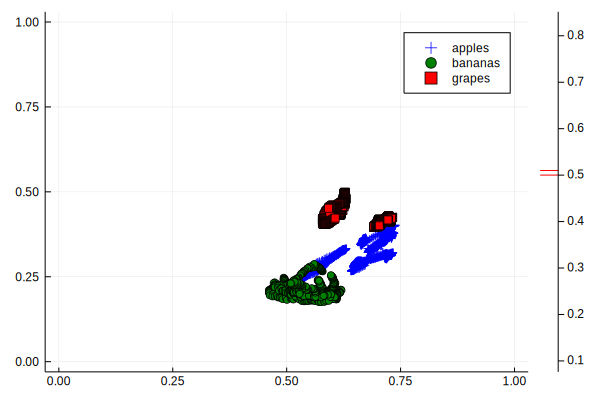

┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Chinmoy\.julia\packages\Plots\vTdnV\src\backends\gr.jl:514


In [69]:
using Plots
plot()

contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y])[1], levels=[0.5, 0.51], color=cgrad([:blue, :blue]))
contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y])[2], levels=[0.5, 0.51], color=cgrad([:green, :green]))
contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y])[3], levels=[0.5, 0.51], color=cgrad([:red, :red]))

scatter!(first.(x_apples), last.(x_apples), m=:cross, label="apples", color = :blue)
scatter!(first.(x_bananas), last.(x_bananas), m=:circle, label="bananas", color = :green)
scatter!(first.(x_grapes), last.(x_grapes), m=:square, label="grapes", color = :red)

Train the model more number of times

In [71]:
for _ in 1:100
    Flux.train!(loss, params(model), data, opt)
end

Observe the decision boundaries are not able to effectively classify the apples/bananas/grapes:
- Red decision boundary has Grapes (red) and few Apples (blue) on one side
- Green decision boundary has Bananas (green) and few Apples (blue) on one side
- Blue decision boundary has Apples(blue) and Grapes(red), Bananas(green) on one side

We might need a more complicated model to handle this complexity.

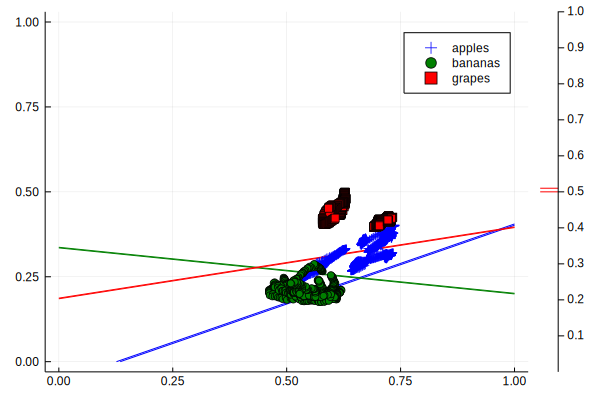

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Chinmoy\.julia\packages\Plots\vTdnV\src\backends\gr.jl:514
┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Chinmoy\.julia\packages\Plots\vTdnV\src\backends\gr.jl:514


In [72]:
plot()

contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y])[1], levels=[0.5, 0.51], color=cgrad([:blue, :blue]))
contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y])[2], levels=[0.5, 0.51], color=cgrad([:green, :green]))
contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y])[3], levels=[0.5, 0.51], color=cgrad([:red, :red]))

scatter!(first.(x_apples), last.(x_apples), m=:cross, label="apples", color = :blue)
scatter!(first.(x_bananas), last.(x_bananas), m=:circle, label="bananas", color = :green)
scatter!(first.(x_grapes), last.(x_grapes), m=:square, label="grapes", color = :red)